In [1]:
pip install yfinance

  Created wheel for multitasking: filename=multitasking-0.0.10-py3-none-any.whl size=8488 sha256=8d625538d81f31585a102042bd58191d3c19168c329fdb0dbec02e6560079fcd
  Stored in directory: c:\users\borka\appdata\local\pip\cache\wheels\21\c9\66\b41c847de65c7985db52ec21d59996841598b8b0e93f2b9500
Successfully built multitasking
Note: you may need to restart the kernel to use updated packages.


In [76]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats as si
import os

In [77]:
initial_data = yf.download("EA ^VIX", start="2020-10-01", end="2021-10-01")

[*********************100%***********************]  2 of 2 completed


In [34]:
initial_data.head()

Adj Close                  Close                   High  \
                    EA       ^VIX          EA       ^VIX          EA   
Date                                                                   
2020-09-30  129.766327  26.370001  130.410004  26.370001  131.990005   
2020-10-01  132.124634  26.700001  132.779999  26.700001  134.059998   
2020-10-02  128.432938  27.629999  129.070007  27.629999  132.240005   
2020-10-05  130.074783  27.959999  130.720001  27.959999  132.949997   
2020-10-06  124.223808  29.480000  124.839996  29.480000  130.399994   

                              Low                   Open              Volume  \
                 ^VIX          EA       ^VIX          EA       ^VIX       EA   
Date                                                                           
2020-09-30  27.120001  129.449997  25.059999  129.729996  26.690001  2164200   
2020-10-01  27.110001  131.460007  25.330000  132.070007  25.780001  1868800   
2020-10-02  29.900000  127.709999  26.930000  131.369995  28.870001  1751200   
2020-10-05  29.690001  129.070007  27.270000  130.089996  29.520000  1270100   
2020-10-06  30.000000  124.519997  26.010000  130.360001  28.049999  3753700   

                 
           ^VIX  
Date             
2020-09-30    0  
2020-10-01    0  
2020-10-02    0  
2020-10-05    0  
2020-10-06    0

In [35]:
initial_data.tail()

Adj Close                  Close                   High  \
                    EA       ^VIX          EA       ^VIX          EA   
Date                                                                   
2021-09-24  129.899994  17.750000  129.899994  17.750000  130.020004   
2021-09-27  131.979996  18.760000  131.979996  18.760000  132.559998   
2021-09-28  133.770004  23.250000  133.770004  23.250000  135.000000   
2021-09-29  137.940002  22.559999  137.940002  22.559999  139.589996   
2021-09-30  142.250000  23.139999  142.250000  23.139999  144.130005   

                              Low                   Open              Volume  \
                 ^VIX          EA       ^VIX          EA       ^VIX       EA   
Date                                                                           
2021-09-24  20.410000  126.860001  17.629999  127.040001  19.330000  2327300   
2021-09-27  19.320000  128.940002  17.740000  129.270004  17.780001  3326800   
2021-09-28  24.820000  131.520004  19.709999  131.860001  19.740000  4349800   
2021-09-29  23.790001  133.809998  21.450001  133.850006  22.070000  5656600   
2021-09-30  24.709999  138.850006  20.600000  139.309998  21.480000  5017700   

                 
           ^VIX  
Date             
2021-09-24    0  
2021-09-27    0  
2021-09-28    0  
2021-09-29    0  
2021-09-30    0

In [36]:
initial_data['Adj Close'].head()

,EA,^VIX
Date,,
2020-09-30,129.766327,26.370001
2020-10-01,132.124634,26.700001
2020-10-02,128.432938,27.629999
2020-10-05,130.074783,27.959999
2020-10-06,124.223808,29.480000


In [37]:
data =  initial_data['Adj Close']
EA = data['EA']
vix = data['^VIX']
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2020-09-30 to 2021-09-30
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   EA      253 non-null    float64
 1   ^VIX    253 non-null    float64
dtypes: float64(2)
memory usage: 5.9 KB


In [38]:
data.head()

,EA,^VIX
Date,,
2020-09-30,129.766327,26.370001
2020-10-01,132.124634,26.700001
2020-10-02,128.432938,27.629999
2020-10-05,130.074783,27.959999
2020-10-06,124.223808,29.480000


In [39]:
data.tail()

,EA,^VIX
Date,,
2021-09-24,129.899994,17.750000
2021-09-27,131.979996,18.760000
2021-09-28,133.770004,23.250000
2021-09-29,137.940002,22.559999
2021-09-30,142.250000,23.139999


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

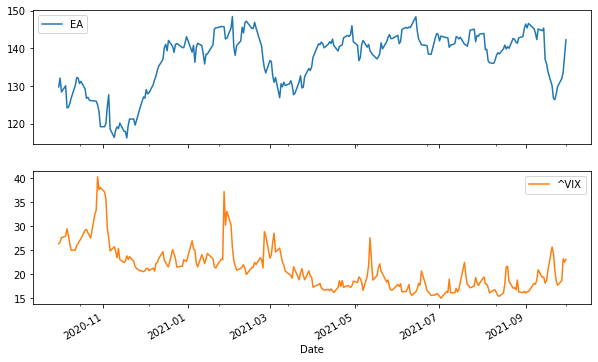

In [57]:
data.plot(figsize=(10, 6), subplots=True)

In [58]:
#SUMMARY STATISTICS

In [41]:
data.describe().round(2)

,EA,^VIX
count,253.00,253.00
mean,137.01,21.29
std,7.65,4.62
min,116.26,15.07
25%,131.43,17.69
50%,140.15,20.79
75%,142.49,23.25
max,148.43,40.28


In [59]:
vol = np.sqrt(253) * log_return.std()
print('The annualised volatility is', round(vol*100,2), '%')

The annualised volatility is 25.46 %


In [70]:
log_return = np.log(data / data.shift(1))

In [73]:
VIX = yf.download("^VIX", start="2020-10-01", end="2021-10-01")

[*********************100%***********************]  1 of 1 completed


In [74]:
vix = VIX['Adj Close'][-1]
print('The market volatility is', round(vix,2), '%')

The market volatility is 23.14 %


In [60]:
rets = np.log(data / data.shift(1))
rets.head().round(4)

,EA,^VIX
Date,,
2020-09-30,NaN,NaN
2020-10-01,0.0180,0.0124
2020-10-02,-0.0283,0.0342
2020-10-05,0.0127,0.0119
2020-10-06,-0.0460,0.0529


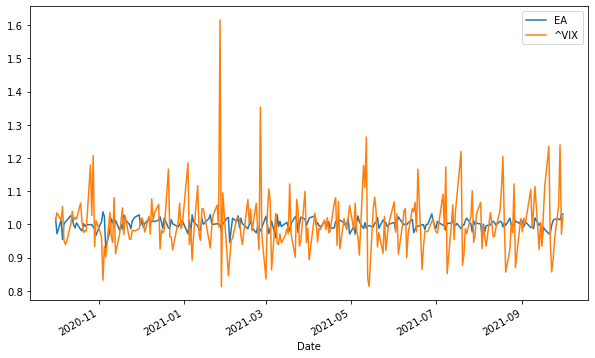

In [61]:
rets.apply(np.exp).plot(figsize=(10, 6));

In [63]:
data.pct_change().round(4).head()

,EA,^VIX
Date,,
2020-09-30,NaN,NaN
2020-10-01,0.0182,0.0125
2020-10-02,-0.0279,0.0348
2020-10-05,0.0128,0.0119
2020-10-06,-0.0450,0.0544


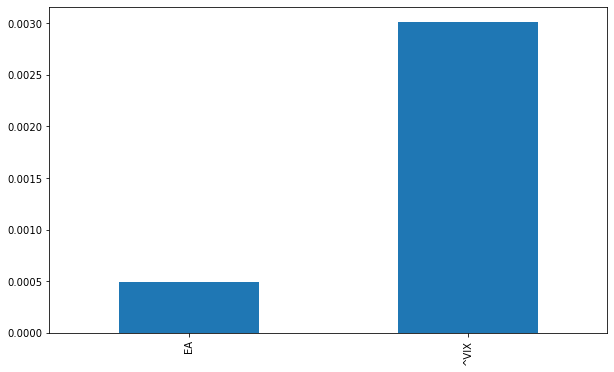

In [64]:
data.pct_change().mean().plot(kind='bar', figsize=(10, 6));

In [78]:
#MODEL Black-Scholes

In [88]:
EA[-1]  #spot price


142.25

In [127]:
def euro_option_bsm(S, K, T, r, q, vol, payoff):
    
    #Spot: spot price
    #K: strike price
    #T: time to maturity
    #r: risk free rate
    #q: continuous dividend yield
    #vol: volatility of underlying asset
    #payoff: call or put
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        option_value = S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        option_value =  - S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) + K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return option_value

In [230]:
euro_option_bsm(142.25, 145, 1, 0.0024, 0.0055, 0.25, 'call')

12.695905633502356

In [231]:
euro_option_bsm(142.25, 145, 1, 0.0024, 0.0055, 0.25, 'put')

15.878550307428966

In [235]:
T = np.linspace(0.25,3,50)
cpd = np.zeros((len(T),1))
for i in range(len(T)):
    cpd [i] = euro_option_bsm(142.25, 145, T[i], 0.0024, 0.0055, 0.25, 'call')

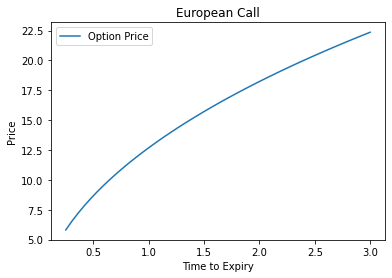

In [236]:
fig = plt.figure()
plt.plot(T, cpd, '-')
plt.xlabel('Time to Expiry')
plt.ylabel('Price')
plt.title('European Call')
plt.legend(['Option Price'])

In [119]:
#Monte Carlo

In [225]:
def mcs_simulation_np(p):
    M = p
    I = p
    dt = T / M 
    S = np.zeros((M + 1, I))
    S[0] = S0 
    rn = np.random.standard_normal(S.shape) 
    for t in range(1, M + 1): 
        S[t] = S[t-1] * np.exp((r - sigma ** 2 / 2) * dt + sigma * np.sqrt(dt) * rn[t]) 
    return S

In [226]:
T = 1
r = 0.0024
sigma = 0.25
S0 = 142.25
K = 145

In [227]:
S = mcs_simulation_np(1000)

In [228]:
S = np.transpose(S)
S

array([[142.25      , 143.04339015, 142.50766043, ..., 188.02538728,
        187.20594845, 186.6233016 ],
       [142.25      , 142.54155033, 143.37315126, ..., 137.95207878,
        137.30548031, 136.14145195],
       [142.25      , 141.80985356, 143.29666249, ..., 161.29801459,
        160.27595375, 160.27250857],
       ...,
       [142.25      , 143.24542463, 143.48104922, ..., 156.46140681,
        157.10909257, 156.38105166],
       [142.25      , 143.29230671, 143.11828748, ..., 153.30873189,
        154.84551978, 154.86504138],
       [142.25      , 142.56744324, 143.47494942, ..., 138.06392432,
        137.6152963 , 137.28248276]])

Text(0.5, 1.0, 'Frequency distribution of the simulated end-of-preiod values')

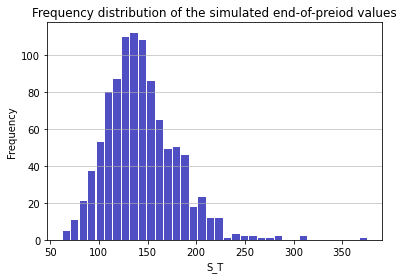

In [229]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(x=S[:,-1], bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('S_T')
plt.ylabel('Frequency')
plt.title('Frequency distribution of the simulated end-of-preiod values')

In [215]:
p = np.mean(np.maximum(K - S[:,-1],0))
print('European put', str(p))

European put 14.803027480680543


In [216]:
c = np.mean(np.maximum(S[:,-1] - K,0))
print('European call', str(c))

European call 13.840284797880773


In [154]:
#greeks

In [155]:
#Delta

In [217]:
def delta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        delta = np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0)
    elif payoff == "put":
        delta =  - np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0)
    
    return delta

In [221]:
delta(142.25, 145, 1, 0.0024, 0.0055, 0.25, 'call')

0.5115413087249828

In [222]:
delta(142.25, 145, 1, 0.0024, 0.0055, 0.25, 'put')

-0.4829737885839363

In [223]:
S = np.linspace(50,150,11)
Delta_Call = np.zeros((len(S),1))
Delta_Put = np.zeros((len(S),1))
for i in range(len(S)):
    Delta_Call [i] = delta(S[i], 145, 1, 0.0024, 0.0055, 0.25, 'call')
    Delta_Put [i] = delta(S[i], 145, 1, 0.0024, 0.0055, 0.25, 'put')

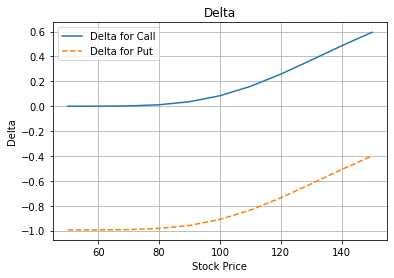

In [224]:
fig = plt.figure()
plt.plot(S, Delta_Call, '-')
plt.plot(S, Delta_Put, '--')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Delta')
plt.title('Delta')
plt.legend(['Delta for Call','Delta for Put'])

In [260]:
S = np.linspace(50, 150, 51)
T = np.linspace(0.5, 2, 51)
Delta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Delta[i,j] = delta(S[j], 145, T[i], 0.0024, 0.0055, 0.25, 'call')

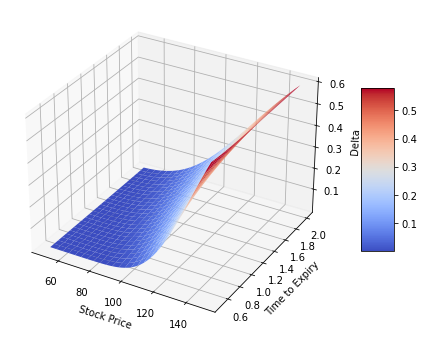

In [261]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Delta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Delta')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [262]:
d = delta(142.25, 145, 1, 0.0024, 0.0055, 0.25, 'call')
print('The value of Delta is', d.round(4),'.','If the stock price increase 1 dollar, then the value of the option will increase $', d.round(4), '.')

The value of Delta is 0.5115 . If the stock price increase 1 dollar, then the value of the option will increase $ 0.5115 .


In [161]:
#Gamma

In [162]:
def gamma(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    gamma = np.exp(-r * T) * si.norm.pdf(d1, 0.0, 1.0) / (vol * S * np.sqrt(T))
    
    return gamma

In [163]:
gamma(142.25, 145, 1, 0.0024, 0.0055, 0.25, 'call')

0.01118391626292785

In [164]:
gamma(142.25, 145, 1, 0.0024, 0.0055, 0.25, 'put')

0.01118391626292785

In [165]:
S = np.linspace(50,150,11)
Gamma = np.zeros((len(S),1))
for i in range(len(S)):
    Gamma [i] = gamma(S[i], 145, 1, 0.0024, 0.0055, 0.25, 'call')

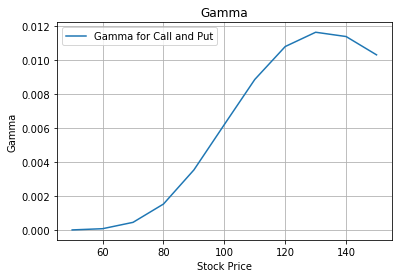

In [166]:
fig = plt.figure()
plt.plot(S, Gamma, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Gamma')
plt.title('Gamma')
plt.legend(['Gamma for Call and Put'])

In [263]:
S = np.linspace(50, 150, 51)
T = np.linspace(0.5, 2, 51)
Gamma = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Gamma[i,j] = gamma(S[j], 145, T[i], 0.0024, 0.0055, 0.25, 'call')

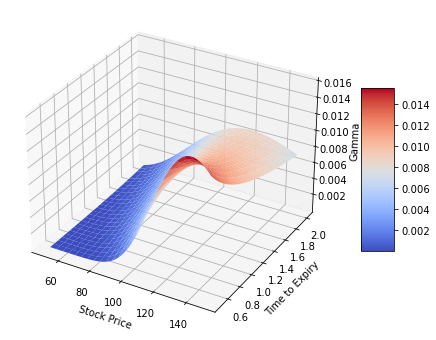

In [264]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Gamma, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Gamma')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [171]:
#Theta

In [172]:
def theta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        theta = vol * S * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        theta = vol * S * np.exp(-q * T) * si.norm.pdf(-d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return theta

In [173]:
theta(142.25, 145, 1, 0.0024, 0.0055, 0.25, 'call')

6.794164722878843

In [174]:
theta(142.25, 145, 1, 0.0024, 0.0055, 0.25, 'put')

6.875340979331276

In [175]:
T = np.linspace(0.25,3,12)
Theta_Call = np.zeros((len(T),1))
Theta_Put = np.zeros((len(T),1))
for i in range(len(T)):
    Theta_Call [i] = theta(142.25, 145, T[i], 0.0024, 0.0055, 0.25, 'call')
    Theta_Put [i] = theta(142.25, 145, T[i], 0.0024, 0.0055, 0.25, 'put')

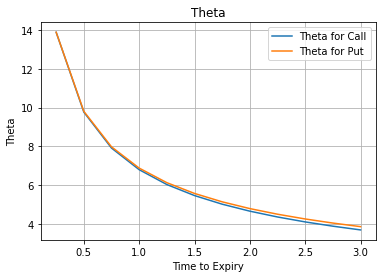

In [176]:
fig = plt.figure()
plt.plot(T, Theta_Call, '-')
plt.plot(T, Theta_Put, '-')
plt.grid()
plt.xlabel('Time to Expiry')
plt.ylabel('Theta')
plt.title('Theta')
plt.legend(['Theta for Call', 'Theta for Put'])

In [265]:
S = np.linspace(50, 150, 51)
T = np.linspace(0.5, 2, 51)
Theta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Theta[i,j] = theta(S[j], 145, T[i], 0.0024, 0.0055, 0.25, 'call')

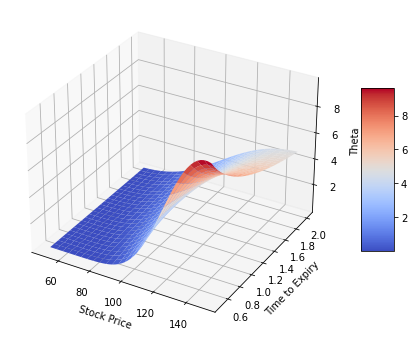

In [266]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Theta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Theta')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [177]:
#Rho

In [178]:
def rho(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        rho =  K * T * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        rho = - K * T * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return rho

In [179]:
rho(142.25, 145, 1, 0.0024, 0.0055, 0.25, 'call')

60.07084553262646

In [180]:
rho(142.25, 145, 1, 0.0024, 0.0055, 0.25, 'put')

-84.5815717334939

In [181]:
r = np.linspace(0,0.1,11)
Rho_Call = np.zeros((len(r),1))
Rho_Put = np.zeros((len(r),1))
for i in range(len(r)):
    Rho_Call [i] = rho(142.25, 145, 1, r[i], 0.0055, 0.25, 'call')
    Rho_Put [i] = rho(142.25, 145, 1, r[i], 0.0055, 0.25, 'put')

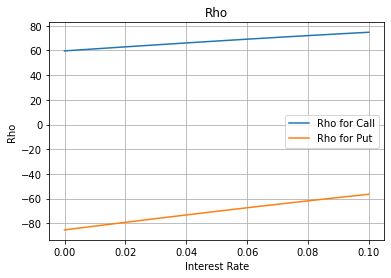

In [182]:
fig = plt.figure()
plt.plot(r, Rho_Call, '-')
plt.plot(r, Rho_Put, '-')
plt.grid()
plt.xlabel('Interest Rate')
plt.ylabel('Rho')
plt.title('Rho')
plt.legend(['Rho for Call', 'Rho for Put'])

In [183]:
#Vega

In [184]:
def vega(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    vega = S * np.sqrt(T) * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0)
    
    return vega

In [185]:
vega(142.25, 145, 1, 0.0024, 0.0055, 0.25, 'call')

56.401694600113984

In [187]:
vega(142.25, 145, 1, 0.0024, 0.0055, 0.25, 'put')

56.401694600113984

In [188]:
vol = np.linspace(0.1,0.4,13)
Vega = np.zeros((len(vol),1))
for i in range(len(vol)):
    Vega [i] = vega(142.25, 145, 1, 0.0024, 0.0055, vol[i], 'call')

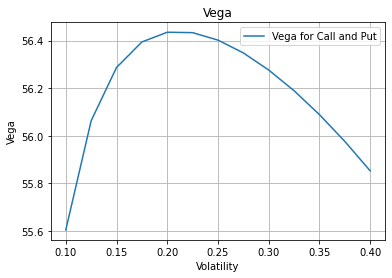

In [189]:
fig = plt.figure()
plt.plot(vol, Vega, '-')
plt.grid()
plt.xlabel('Volatility')
plt.ylabel('Vega')
plt.title('Vega')
plt.legend(['Vega for Call and Put'])

In [270]:
S = np.linspace(50, 150, 51)
T = np.linspace(0.5, 2, 51)
Vega = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Vega[i,j] = vega(S[j], 145, T[i], 0.0024, 0.0055, 0.25, 'call')

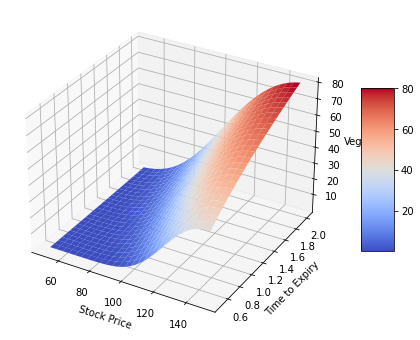

In [271]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Vega, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Vega')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [190]:
#Has Black Scholes correctly predicted the market value of the options?


In [250]:
EA = yf.Ticker('EA')
opt = Ea.option_chain('2021-12-10')
opt.calls

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,EA211210C00095000,2021-11-29 20:16:11,95.0,30.80,28.60,30.95,30.80,NaN,NaN,11,1.628908,True,REGULAR,USD
1,EA211210C00100000,2021-12-03 20:14:11,100.0,24.65,24.65,25.65,24.65,NaN,4.0,0,1.212895,True,REGULAR,USD
2,EA211210C00105000,2021-12-02 17:10:58,105.0,18.65,19.45,20.75,18.65,NaN,NaN,9,1.051763,True,REGULAR,USD
3,EA211210C00110000,2021-12-02 17:04:31,110.0,13.60,14.50,16.00,13.60,NaN,NaN,1,0.931641,True,REGULAR,USD
4,EA211210C00113000,2021-12-02 17:10:08,113.0,10.85,12.00,12.95,10.85,NaN,NaN,1,0.567387,True,REGULAR,USD
5,EA211210C00114000,2021-12-03 19:52:00,114.0,10.15,11.35,12.30,10.15,NaN,1.0,1,0.681644,True,REGULAR,USD
6,EA211210C00115000,2021-12-02 20:30:31,115.0,8.30,10.45,11.00,0.00,0.000000,1.0,2,0.599613,True,REGULAR,USD
7,EA211210C00116000,2021-12-03 16:09:05,116.0,8.85,9.65,10.25,8.85,NaN,2.0,0,0.629398,True,REGULAR,USD
8,EA211210C00117000,2021-12-03 14:44:11,117.0,6.85,8.75,9.30,0.30,4.580148,2.0,6,0.602543,True,REGULAR,USD
9,EA211210C00119000,2021-12-03 17:21:45,119.0,5.90,6.95,7.40,5.90,NaN,1.0,0,0.539555,True,REGULAR,USD


In [251]:
data = yf.download("EA", start="2020-10-01", end="2021-10-01")

[*********************100%***********************]  1 of 1 completed


In [252]:
data['Adj Close']

Date
2020-09-30    129.766327
2020-10-01    132.124619
2020-10-02    128.432953
2020-10-05    130.074799
2020-10-06    124.223808
                 ...    
2021-09-24    129.899994
2021-09-27    131.979996
2021-09-28    133.770004
2021-09-29    137.940002
2021-09-30    142.250000
Name: Adj Close, Length: 253, dtype: float64

In [253]:
S = data['Adj Close'][-1]
K = opt.calls['strike']
T = 4/52
r = 0.0024
q = 0.0055
log_return = np.log(data['Adj Close'] / data['Adj Close'].shift(1))
vol = np.sqrt(253) * log_return.std() 
vol

0.25461804584992365

In [255]:
EA_bsm_call = np.zeros((len(K),1))
for i in range(len(K)):
    EA_bsm_call [i] = euro_option_bsm(S, K[i], T, r, q, vol, 'call')

In [256]:
opt.calls['BSMPrice'] = pd.DataFrame(EA_bsm_call).round(2)
opt.calls

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency,BSMPrice
0,EA211210C00095000,2021-11-29 20:16:11,95.0,30.80,28.60,30.95,30.80,NaN,NaN,11,1.628908,True,REGULAR,USD,47.21
1,EA211210C00100000,2021-12-03 20:14:11,100.0,24.65,24.65,25.65,24.65,NaN,4.0,0,1.212895,True,REGULAR,USD,42.21
2,EA211210C00105000,2021-12-02 17:10:58,105.0,18.65,19.45,20.75,18.65,NaN,NaN,9,1.051763,True,REGULAR,USD,37.21
3,EA211210C00110000,2021-12-02 17:04:31,110.0,13.60,14.50,16.00,13.60,NaN,NaN,1,0.931641,True,REGULAR,USD,32.21
4,EA211210C00113000,2021-12-02 17:10:08,113.0,10.85,12.00,12.95,10.85,NaN,NaN,1,0.567387,True,REGULAR,USD,29.21
5,EA211210C00114000,2021-12-03 19:52:00,114.0,10.15,11.35,12.30,10.15,NaN,1.0,1,0.681644,True,REGULAR,USD,28.21
6,EA211210C00115000,2021-12-02 20:30:31,115.0,8.30,10.45,11.00,0.00,0.000000,1.0,2,0.599613,True,REGULAR,USD,27.21
7,EA211210C00116000,2021-12-03 16:09:05,116.0,8.85,9.65,10.25,8.85,NaN,2.0,0,0.629398,True,REGULAR,USD,26.22
8,EA211210C00117000,2021-12-03 14:44:11,117.0,6.85,8.75,9.30,0.30,4.580148,2.0,6,0.602543,True,REGULAR,USD,25.22
9,EA211210C00119000,2021-12-03 17:21:45,119.0,5.90,6.95,7.40,5.90,NaN,1.0,0,0.539555,True,REGULAR,USD,23.23


In [257]:
opt.calls['estimate_error'] = ((opt.calls['lastPrice'] - opt.calls['BSMPrice'])/opt.calls['BSMPrice'])*100
opt.calls['estimate_error']

0      -34.759585
1      -41.601516
2      -49.879065
3      -57.777088
4      -62.855187
5      -64.019851
6      -69.496509
7      -66.247140
8      -72.839017
9      -74.601808
10     -80.890288
11     -74.588235
12     -81.737414
13     -79.771784
14     -85.253960
15     -86.389850
16     -85.347985
17     -87.556708
18     -89.586207
19     -90.574374
20     -93.375394
21     -92.796610
22     -94.881170
23     -95.548961
24     -95.913978
25     -97.303634
26     -97.686375
27     -97.316384
28     -97.815913
29     -97.400347
30     -98.069498
31     -98.272138
32     -95.620438
33     -96.703297
34     -96.875000
35     -97.500000
36     -97.131148
37     -93.867925
38     -99.453552
39     -92.356688
40     -93.283582
41     -98.245614
42     -14.285714
43      57.142857
44    2000.000000
45     400.000000
46            inf
47            inf
Name: estimate_error, dtype: float64

In [258]:
opt.calls['estimate_error'].replace([np.inf, -np.inf], np.nan).dropna(axis=0).describe()

count      46.000000
mean      -24.137697
std       314.413514
min       -99.453552
25%       -96.832074
50%       -90.080290
75%       -70.332136
max      2000.000000
Name: estimate_error, dtype: float64

Text(0.5, 1.0, 'Histogram of Estimate Error')

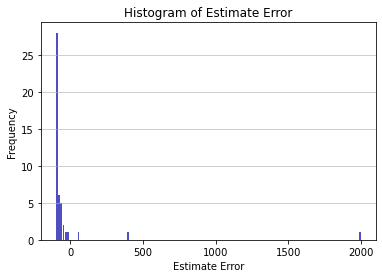

In [259]:
n, bins, patches = plt.hist(x=opt.calls['estimate_error'].replace([np.inf, -np.inf], np.nan).dropna(axis=0), bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('Estimate Error')
plt.ylabel('Frequency')
plt.title('Histogram of Estimate Error')